In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

import cv2

# Load and observe the data-

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to fit model input
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
])

# labels 
labels = dict(pd.read_csv("dataset/train_data.csv").values)

# Load dataset
train_dataset = ImageFolder(root="dataset/train_images", transform=transform)
#val_dataset = ImageFolder(root="dataset/val", transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


FileNotFoundError: Couldn't find any class folder in ./dataset/train_images.

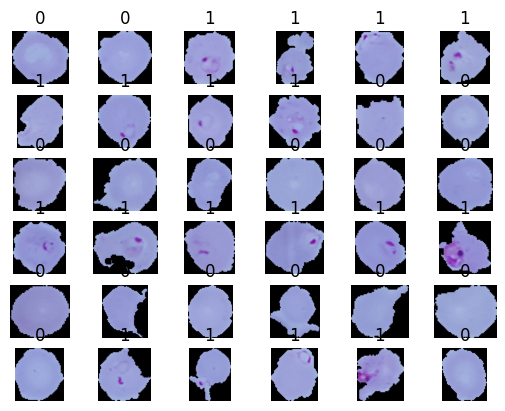

In [25]:
filenames = list(images.keys())

n = 6
for i in range(1,n*n+1):
    plt.subplot(n,n,i)
    plt.title(keys[filenames[i]])
    plt.axis("off")
    plt.imshow(images[filenames[i]])
plt.show()

# Load and define the model 

In [26]:
from torchvision import models
from torch import nn
import torch


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1)  # Modify last layer for binary classification
model = model.to(device)

c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\javie\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\javie/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:02<00:00, 19.1MB/s]


In [29]:
criterion = nn.BCEWithLogitsLoss()  # Suitable for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train

In [ ]:
def train(num_epochs = 10):
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)  # Reshape labels

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")
